In [25]:
import numpy as np
import pandas as pd
import import_ipynb
import matplotlib.pyplot as plt

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
data = pd.read_csv("data.csv")

print(data.shape)

X = data[['','','','']] # data

y = data['target']

X = (X - np.mean(X))/np.std(X) # Standarize the data

(351, 11)


In [39]:
def _error(actual, predicted):
    '''Simple Error'''
    return actual - predicted

In [40]:
def mean_error(actual,predicted):
    '''mean_error'''
    error = np.mean(_error(actual, predicted))
    return error

In [41]:
def mean_absolute_error(actual,predicted):
    '''Mean Absolte Error'''
#   error = mean_absolute_error(actual,predicted)
    error = np.mean(np.abs(_error(actual, predicted)))
    return error

In [42]:
def mean_squared_error(actual,predicted):
    '''Mean Squared Error'''
    #error = mean_squared_error(actual,predicted)
    error = np.mean(np.square(_error(actual, predicted)))
    return error

In [43]:
def root_mean_squared_error(actual,predicted):
    '''Root Mean Squared Error'''
    error = np.sqrt(mean_squared_error(actual,predicted))
    return error

In [44]:
def normalize_root_mean_absolute_error(actual,predicted):
    '''Normalized Root Mean Squared Error '''
    error = root_mean_squared_error(actual, predicted) / (actual.max() - actual.min())
    return error

In [45]:
def median_absolute_error(actual,predicted):
    '''Median Absolute Error'''
    error = np.median(np.abs(_error(actual, predicted)))
    return error

In [46]:
def compute_error(actual,predicted,loss_function):
    error = 0
    if loss_function == 'mse':
        error = mean_squared_error(actual,predicted)
    elif loss_function == 'mae':
        error = mean_absolute_error(actual,predicted)
    elif loss_function == 'me':
        error = mean_error(actual,predicted)
    elif loss_function == 'rmse':
        error = root_mean_squared_error(actual,predicted)
    elif loss_function == 'nmae':
        error = normalize_root_mean_absolute_error(actual,predicted)
    elif loss_function == 'median absolute error':
        error = median_absolute_error(actual,predicted)
    return error

In [47]:
def get_Loss(X,y,learning_rate,loss_function):
    
    m = len(y) 
    ones = np.ones((m,1))
    X = np.hstack((ones, X))

    y = y[:,np.newaxis]

    theta = np.zeros(( X.shape[1],1))
    iteration = 1000

    loss = []
    iterations = []
    r2score = []

    y_predicted = np.dot(X, theta)
    
    for i in range(iteration):
        y_predicted = np.dot(X, theta)

        error = compute_error(y_predicted,y,loss_function)

        loss.append(error)

        iterations.append(i)

        temp = y_predicted - y

        temp = np.dot(X.T, temp)

        theta = theta - (learning_rate / m) * temp
    
    return iterations,loss

Text(0.5, 1.0, 'Error Function: MSE')

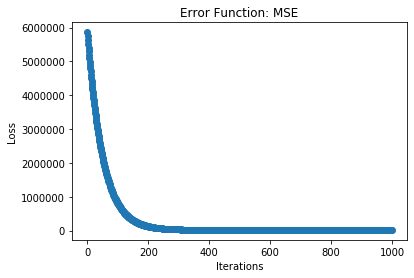

In [48]:
X = data[['','','']]

y = data['1CS']

X = (X - np.mean(X))/np.std(X) # Standarize the data

iterations,loss = get_Loss(X,y,0.01,'mse')

plt.scatter(iterations,loss)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Error Function: MSE")

Text(0.5, 1.0, 'Error Function: MAE')

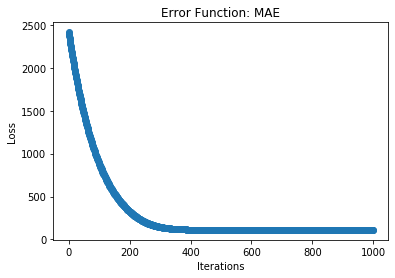

In [49]:
iterations,loss = get_Loss(X,y,0.01,'mae')

plt.scatter(iterations,loss)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Error Function: MAE")

Text(0.5, 1.0, 'Error Function: Mean Error')

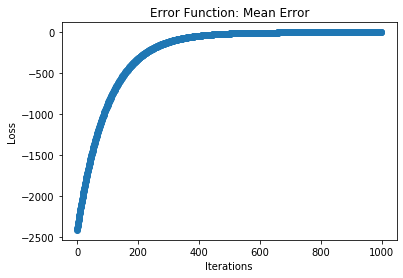

In [50]:
iterations,loss = get_Loss(X,y,0.01,'me')

plt.scatter(iterations,loss)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Error Function: Mean Error")

Text(0.5, 1.0, 'Error Function: RMSE')

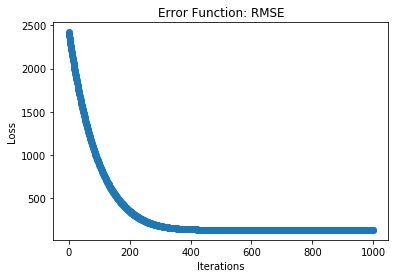

In [51]:
iterations,loss = get_Loss(X,y,0.01,'rmse')

plt.scatter(iterations,loss)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Error Function: RMSE")

Text(0.5, 1.0, 'Error Function: Normalized Root Mean Squared Error')

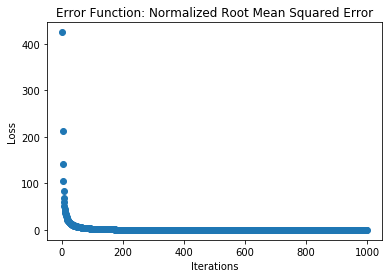

In [52]:
iterations,loss = get_Loss(X,y,0.01,'nmae')

plt.scatter(iterations,loss)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Error Function: Normalized Root Mean Squared Error")

Text(0.5, 1.0, 'Error Function: median absolute error')

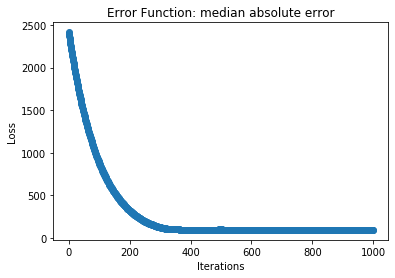

In [53]:
iterations,loss = get_Loss(X,y,0.01,'median absolute error')

plt.scatter(iterations,loss)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Error Function: median absolute error")